## [Fashion-MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist)

In [ ]:
import os
import random
import numpy as np
import torch
import torchvision

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [ ]:
dataset = torchvision.datasets.FashionMNIST('./data', download=True)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [ ]:
print(len(dataset))

60000


In [ ]:
n = 200
data, target = dataset[n]

In [ ]:
print(type(data))

<class 'PIL.Image.Image'>


In [ ]:
print(data.mode, data.width, data.height)

L 28 28


In [ ]:
print(type(target))

<class 'int'>


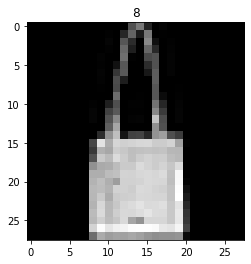

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [ ]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.FashionMNIST('./data', transform = ToTensor)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


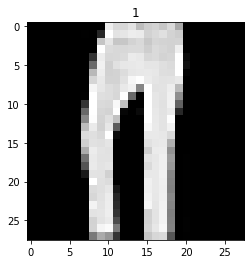

In [ ]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


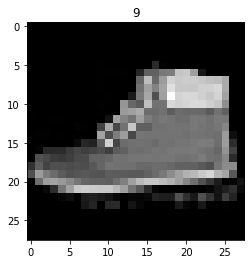

In [ ]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [ ]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [ ]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [ ]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

train_data = torchvision.datasets.FashionMNIST(root='./data/', train=True, transform=compose, download=True)
test_data  = torchvision.datasets.FashionMNIST(root='./data/', train=False, transform=compose, download=True)

In [ ]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 10000


In [ ]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [ ]:
class FashionMNISTModel(nn.Module):
    def __init__(self, output_size):
        super(FashionMNISTModel, self).__init__()

        self.c1 = nn.Conv2d(1, 8, kernel_size=3)
        self.c2 = nn.Conv2d(8, 16, kernel_size=3) # (n, 16, 11, 11)
        self.c3 = nn.Conv2d(16, 32, kernel_size=3) # (n, 32, 9, 9)
        self.c4 = nn.Conv2d(32, 32, kernel_size=1) # (n, 32, 9, 9)

        nn.init.kaiming_normal_(self.c1.weight)
        nn.init.kaiming_normal_(self.c2.weight)
        nn.init.kaiming_normal_(self.c3.weight)
        nn.init.kaiming_normal_(self.c4.weight)
        
        self.cv = nn.Sequential(
                self.c1,
                nn.BatchNorm2d(8),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.MaxPool2d(2),
                self.c2,
                nn.BatchNorm2d(16),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c3,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c4,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2)
        )

        self.l1 = nn.Linear(32*9*9, 512)
        self.l2 = nn.Linear(512, 256)
        self.l3 = nn.Linear(256, output_size)
        nn.init.kaiming_normal_(self.l1.weight)
        nn.init.kaiming_normal_(self.l2.weight)
        nn.init.kaiming_normal_(self.l3.weight)

        self.fc = nn.Sequential(self.l1,
                        nn.BatchNorm1d(512),
                        self.l2,
                        nn.BatchNorm1d(256),
                        self.l3,
                        nn.BatchNorm1d(output_size),
                    )        

    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 32*9*9)
        output = self.fc(x)
        value = torch.max(output, 1)[1]
        return output, value

In [ ]:
model = FashionMNISTModel(10).to(device)

In [ ]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 1, 28, 28])
tensor([[-1.3900, -1.3306,  0.4967,  0.1414, -0.5552,  0.5418,  0.8915,  0.2297,
          0.7857, -1.9594],
        [-0.0032,  1.8655, -0.2704, -0.6090, -0.2154, -1.0080, -0.4247, -0.6658,
          0.6826, -0.4122],
        [ 0.3494, -0.5380, -0.8480, -0.2100,  0.4901, -0.7272,  0.0297, -0.1610,
          0.0655, -0.0630],
        [-0.6108,  0.0967,  1.3684,  2.0895, -1.6337,  1.8298,  1.0814,  1.6002,
         -1.5689,  1.7995],
        [-0.2366,  0.3785,  0.0180, -1.1052, -0.6062, -0.8864,  1.8557, -0.7222,
          1.9750,  1.2009],
        [-0.5382,  0.5665,  0.7595,  0.0102, -0.1323, -0.5705, -1.6442, -1.5134,
         -0.5548,  0.6922],
        [ 0.5995, -0.4235, -2.3437, -0.7676,  1.7970, -0.2885,  0.3462,  1.6709,
         -0.0715, -0.7837],
        [ 2.5567, -1.0219, -0.0092, -0.0699, -0.9767,  1.3834, -0.5498,  0.0589,
         -1.3048,  0.1242],
        [-0.5462, -0.9541, -0.1665,  1.5346,  0.4215,  0.7759, -0.9108,  0.5216,
         -0.5217, -

In [ ]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [ ]:
model = FashionMNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 5 # 5회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, idx_pred = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 0.7335737983385722 test loss: 0.523291003704071, accuracy: 83.93000030517578
epoch 1th training loss: 0.4494249110420545 test loss: 0.40502843260765076, accuracy: 87.22999572753906
epoch 2th training loss: 0.3827111666401227 test loss: 0.35580937564373016, accuracy: 88.15999603271484
epoch 3th training loss: 0.34573809107144676 test loss: 0.328073126077652, accuracy: 88.82999420166016
epoch 4th training loss: 0.32652792781591417 test loss: 0.31036269962787627, accuracy: 89.04999542236328


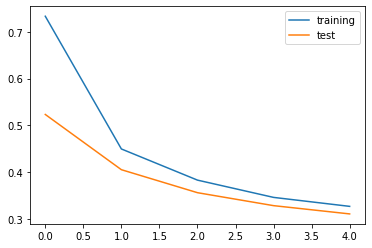

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.903
